# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from matplotlib import style
from matplotlib.cm import ScalarMappable

# Load the dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/IR_assign3/soc-sign-bitcoinalpha.csv.gz',  compression='gzip',header=None,error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print("printing dataset directly using pandas dataset:")
print(dataset)

printing dataset directly using pandas dataset:
          0     1   2           3
0      7188     1  10  1407470400
1       430     1  10  1376539200
2      3134     1  10  1369713600
3      3026     1  10  1350014400
4      3010     1  10  1347854400
...     ...   ...  ..         ...
24181  7604  7601  10  1364270400
24182  7601  7604  10  1364270400
24183  7604  7602  10  1364270400
24184  7602  7604  10  1364270400
24185  7604  7603 -10  1364270400

[24186 rows x 4 columns]


In [ ]:
def nodes_vs_outdegree_plotter(in_degree_dict,out_degree_dict):
  x_axis=out_degree_dict.keys()
  y_axis=out_degree_dict.values()
  plt.figure(figsize=(15,8),dpi=80)
  plt.scatter(x_axis,y_axis)
  plt.xlabel('Nodes')
  plt.ylabel('Outdegree')
  plt.show()

In [ ]:
def nodes_vs_indegree_plotter(in_degree_dict,out_degree_dict):
  x_axis=in_degree_dict.keys()
  y_axis=in_degree_dict.values()
  plt.figure(figsize=(15,8),dpi=80)
  plt.scatter(x_axis,y_axis)
  plt.xlabel('Nodes')
  plt.ylabel('Indegree')
  plt.show()

In [ ]:
def dictionary_builder(dicty):
  dict_to_ret={}
  for node in dicty:
    deg=dicty[node]
    if deg not in dict_to_ret:
      dict_to_ret[deg]=1
    else:
      dict_to_ret[deg]+=1
  return dict_to_ret

In [ ]:
def plotDegree(in_degree_dict,out_degree_dict):
  style.use('ggplot') 
  nodes_vs_outdegree_plotter(in_degree_dict,out_degree_dict)
  nodes_vs_indegree_plotter(in_degree_dict,out_degree_dict)

  fractionIndegreeDict = dictionary_builder(in_degree_dict)

  for node in fractionIndegreeDict:
    fractionIndegreeDict[node] = fractionIndegreeDict[node] / number_of_nodes

  fractionIndegreeDictSorted = dict(sorted(fractionIndegreeDict.items()))
  plt.figure(figsize=(15, 8), dpi=80)
  listy1=list(fractionIndegreeDictSorted.keys())
  listy2=list(fractionIndegreeDictSorted.values())
  plt.plot(listy1[1:], listy2[1:], color = 'b', linewidth = 2)
  plt.title('InDegree Distribution')
  plt.xlabel('In Degree of Node')
  plt.ylabel('Fraction of Nodes with In Degree')
  plt.show()



  fractionOutdegreeDict = dictionary_builder(out_degree_dict)
      
  for node in fractionOutdegreeDict:
    fractionOutdegreeDict[node] = fractionOutdegreeDict[node] / number_of_nodes
  fractionOutdegreeDict=sorted(fractionOutdegreeDict.items())
  fractionOutdegreeDictSorted = dict(fractionOutdegreeDict)
  plt.figure(figsize=(15, 8), dpi=80)
  listy2_1=list(fractionOutdegreeDictSorted.keys())
  listy2_2=list(fractionOutdegreeDictSorted.values())
  plt.plot(listy2_1[1:], listy2_2[1:], color = 'b', linewidth = 2)
  plt.title('OutDegree Distribution')
  plt.xlabel('Out Degree of Node')
  plt.ylabel('Fraction of Nodes with Out Degree')
  plt.show()

Number of Nodes: 3783
Number of Edges: 24186
Edge List representation of the network: [[7188, 1], [430, 1], [3134, 1], [3026, 1], [3010, 1], [804, 1], [160, 1], [95, 1], [377, 1], [888, 1], [89, 1], [1901, 1], [161, 1], [256, 1], [351, 1], [3329, 1], [3341, 1], [649, 1], [1583, 1], [87, 1], [37, 1], [309, 1], [821, 1], [1496, 1], [637, 1], [964, 1], [594, 1], [2249, 1], [554, 1], [20, 1], [2227, 1], [1315, 1], [519, 1], [1316, 1], [2149, 1], [1724, 1], [18, 1], [57, 1], [118, 1], [3254, 1], [1177, 1], [112, 1], [11, 1], [586, 1], [35, 1], [15, 1], [1445, 1], [152, 1], [2, 1], [113, 1], [44, 1], [2401, 1], [10, 1], [2378, 1], [126, 1], [3245, 1], [783, 1], [493, 1], [1358, 1], [1180, 1], [529, 1], [333, 1], [1538, 1], [2282, 1], [1519, 1], [2966, 1], [474, 1], [330, 1], [958, 1], [17, 1], [1295, 1], [38, 1], [1952, 1], [223, 1], [625, 1], [1392, 1], [3355, 1], [1881, 1], [58, 1], [96, 1], [1580, 1], [196, 1], [146, 1], [416, 1], [1198, 1], [3319, 1], [1867, 1], [896, 1], [617, 1], [3300

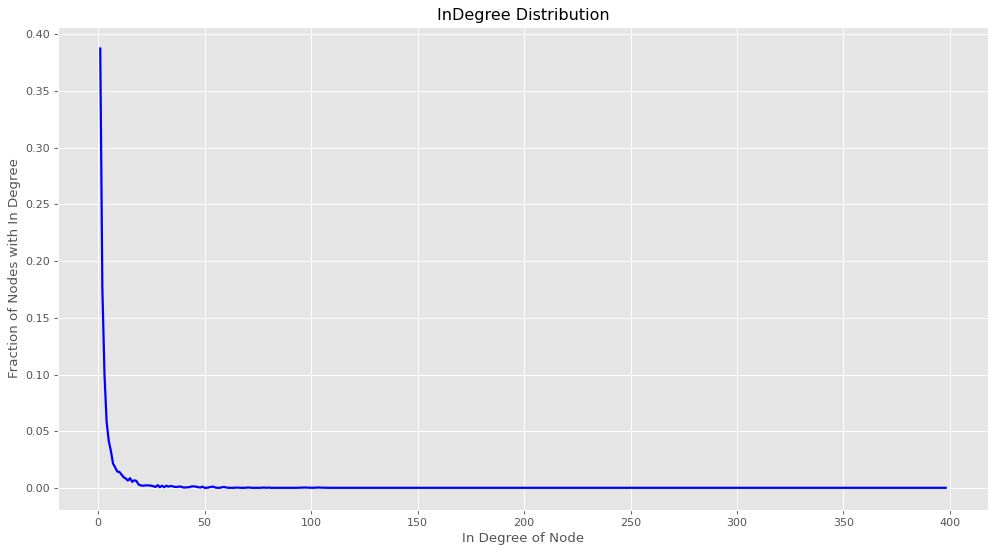

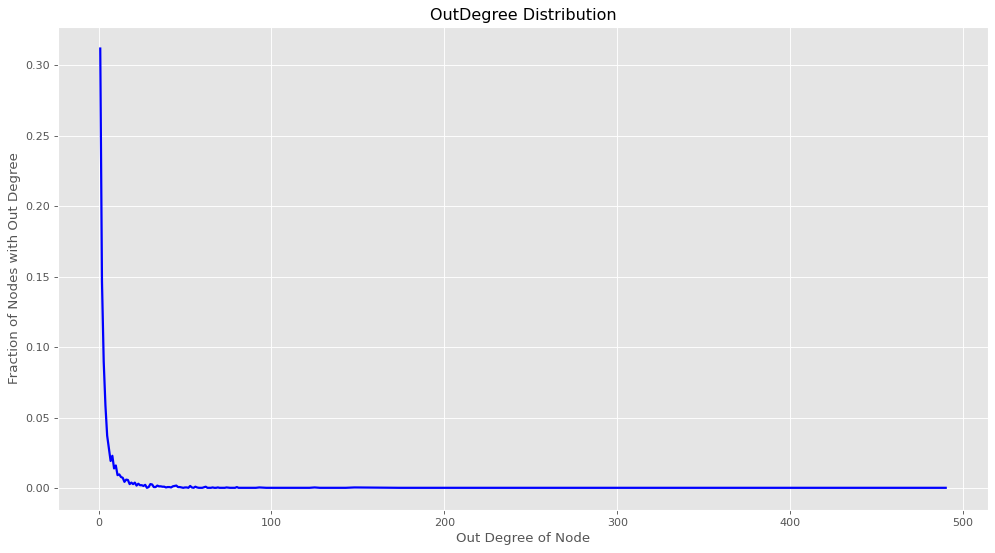

In [ ]:
G_edges = []
G_nodes = []
for i in range(0,dataset.shape[0]):
  G_edges.append([dataset[0][i],dataset[1][i]])
  G_nodes.append(dataset[0][i])
  G_nodes.append(dataset[1][i])
Unique_nodes = np.unique(G_nodes)
number_of_nodes = np.unique(G_nodes).shape[0]
# print("shape is:",np.unique(G_nodes).shape[0])

print("Number of Nodes: "+ str(number_of_nodes))
print("Number of Edges: "+ str(len(G_edges)))
print("Edge List representation of the network: "+str(G_edges))
#Adjacency matrix in making
Adjacency_Matrix = np.ones((number_of_nodes,number_of_nodes), dtype = 'int')
for i in range(number_of_nodes):
  for j in range(number_of_nodes):
    Adjacency_Matrix[i][j]=0
df_AdjMatrix = pd.DataFrame(data =Adjacency_Matrix, index=Unique_nodes,columns=Unique_nodes)
for i in range(0,len(G_edges)):
  df_AdjMatrix[G_edges[i][0]][G_edges[i][1]]=1
print("Adjacency Matrix representaion of the network:")
print(df_AdjMatrix)

#indegree and outdegree calculation
in_degree_dict={}
out_degree_dict = {}
# in order to calculate the in_degree and out_degree for each node we simply add the number of 
# incoming and outgoint edges for each node reading from the adj_matrix we already made
for i in df_AdjMatrix.index:
  out_degree_dict[i] = sum(df_AdjMatrix[i])
  in_degree_dict[i] = sum(df_AdjMatrix.loc[i])
# now in order to get the average in-degree and out-degree
# we divide the sum of indegree and outdegree of each node by the total number of nodes
indegree_total=sum(in_degree_dict.values())
outdegree_total=sum(out_degree_dict.values())
avg_indegree=indegree_total/number_of_nodes
avg_outdegree=outdegree_total/number_of_nodes
print("Average in-degree "+str(avg_indegree))
print("Average out-degree "+str(avg_outdegree))

max_indegree=0
for val in in_degree_dict.values():
  if(val>max_indegree):
    max_indegree=val

for key,value in in_degree_dict.items():
  if value == max_indegree:
    print("node : "+str(key)+" in_degree: "+str(value)+", with max_in-degree: "+str(max_indegree))

max_outdegree=0
for val in out_degree_dict.values():
  if(val>max_outdegree):
    max_outdegree=val

for key,value in out_degree_dict.items():
  if value == max_outdegree:
    print("node : "+str(key)+" out_degree: "+str(value)+", with max_out-degree: "+str(max_outdegree))

density = len(G_edges)/(number_of_nodes*(number_of_nodes - 1))
print("Density "+ str(density))

plotDegree(in_degree_dict,out_degree_dict)



In [ ]:
adjacency_matrix = df_AdjMatrix.to_numpy()
average_clustering_coeficient=0
cluster_coef = []
for node in range(len(adjacency_matrix)):
  neighbors=np.where(adjacency_matrix[node]>0)[0]
  num_neigh=len(neighbors)
  edges_neigh=0
  if num_neigh>1:
    for i in neighbors:
      for j in neighbors:
        if i!=j and adjacency_matrix[i][j]>0:
          edges_neigh+=1
    edges_neigh/=2
    cluster_coef.append(2*edges_neigh/(num_neigh*(num_neigh-1)))
    average_clustering_coeficient+=(2*edges_neigh/(num_neigh*(num_neigh-1)))
  

average_clustering_coeficient/=adjacency_matrix.shape[0]
print("The Average Clustering Coefficient is ",average_clustering_coeficient)

The Average Clustering Coefficient is  0.15255370236987909


In [ ]:
fraction_of_nodes = {}
for i in range(0,len(cluster_coef)):
  coef = cluster_coef[i]

  if coef not in fraction_of_nodes:
    fraction_of_nodes[coef] = 1

  else:
    fraction_of_nodes[coef] += 1
for node in fraction_of_nodes:
    fraction_of_nodes[node] = fraction_of_nodes[node] / number_of_nodes

In [ ]:
cluster_coef

[0.008088300444286926,
 0.05282161645145863,
 0.034438247011952194,
 0.027860696517412936,
 0.067312234293812,
 0.05948284850380565,
 0.04171292624900872,
 0.06980136909437773,
 0.08276372750056961,
 0.04829417926081101,
 0.062137248207579376,
 0.0609621062992126,
 0.03482409913117789,
 0.06980240549828179,
 0.0785685725709716,
 0.038698915763135944,
 0.08290065766701281,
 0.03196803196803197,
 0.13036941580756015,
 0.15602322206095792,
 0.09377289377289377,
 0.08290500666285931,
 0.04278846153846154,
 0.1541031809676557,
 0.07681324957167333,
 0.07711837511900983,
 0.08124346917450366,
 0.03039832285115304,
 0.13638850889192886,
 0.07690387016229713,
 0.15434272300469484,
 0.15492957746478872,
 0.049253947559032306,
 0.13043478260869565,
 0.07497741644083107,
 0.13859649122807016,
 0.12560386473429952,
 0.07218001168907072,
 0.09760522496371553,
 0.07737341772151898,
 0.1164989939637827,
 0.12436708860759493,
 0.1277056277056277,
 0.07950680272108844,
 0.051201923076923075,
 0.0420408

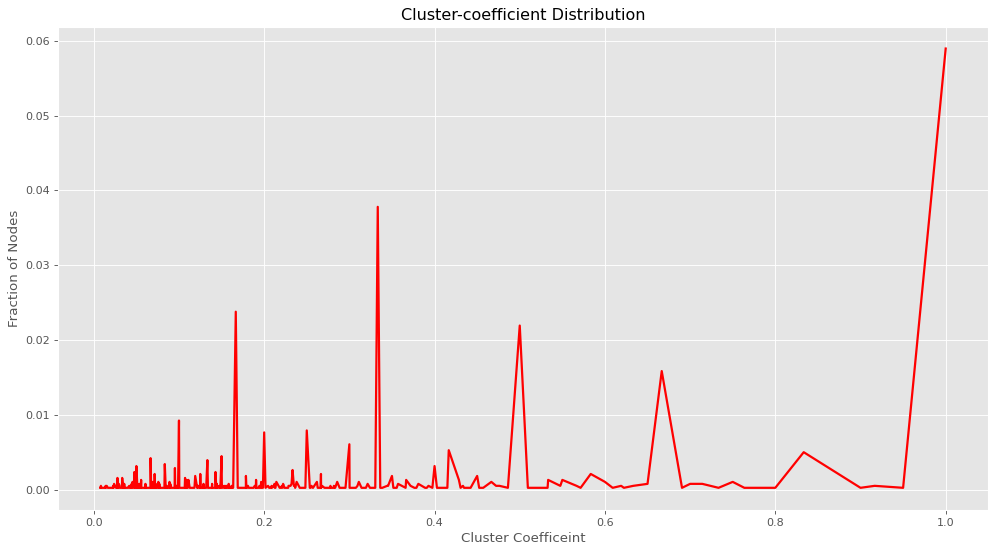

In [ ]:
style.use('ggplot')
fraction_of_nodes = dict(sorted(fraction_of_nodes.items()))
plt.figure(figsize=(15, 8), dpi=80)
plt.plot(list(fraction_of_nodes.keys())[1:], list(fraction_of_nodes.values())[1:], color = 'r', linewidth = 2)
plt.title('Cluster-coefficient Distribution')
plt.xlabel('Cluster Coefficeint')
plt.ylabel('Fraction of Nodes')
plt.show()

Question 2 starts here

In [ ]:
import networkx as nx
DGP=nx.DiGraph()
DGP.add_nodes_from(G_nodes)
DGP.add_edges_from(G_edges)

In [ ]:
G = nx.DiGraph()
for i in range(0,dataset.shape[0]):
  G.add_edge(dataset[0][i],dataset[1][i])

In [ ]:
def sorteddic(dictionary,rev=False):
  sortone=sorted(dictionary.items(), key=lambda item: item[1],reverse=rev)
  sorted_dict=dict(sortone)
  return sorted_dict

In [ ]:
pagerank = nx.pagerank(G)
sorted_pgr=sorteddic(pagerank,rev=True)

print("Top 5 page rank scores are")
i=0
for k, v in sorted_pgr.items():
    print(str(k)+"--->"+str(v))
    i=i+1
    if(i==5):
      break


print("Page Rank Score: ")
print("Nodes: ", list(pagerank.keys())[:10])
print("Page Rank Scores: ", list(pagerank.values())[:10])

Top 5 page rank scores are
1--->0.01699309922840529
3--->0.008960320960927018
4--->0.008023439583332511
2--->0.006623183283223336
177--->0.006607811108334513
Page Rank Score: 
Nodes:  [7188, 1, 430, 3134, 3026, 3010, 804, 160, 95, 377]
Page Rank Scores:  [4.9739967085536536e-05, 0.01699309922840529, 0.0002875150716955739, 0.00011917626603597539, 7.937879011849086e-05, 7.937879011849086e-05, 0.00034797608896262324, 0.0004624121679665047, 0.0029480420558399742, 0.00031075173665250913]


In [ ]:
list(DGP.nodes)

[7188,
 1,
 430,
 3134,
 3026,
 3010,
 804,
 160,
 95,
 377,
 888,
 89,
 1901,
 161,
 256,
 351,
 3329,
 3341,
 649,
 1583,
 87,
 37,
 309,
 821,
 1496,
 637,
 964,
 594,
 2249,
 554,
 20,
 2227,
 1315,
 519,
 1316,
 2149,
 1724,
 18,
 57,
 118,
 3254,
 1177,
 112,
 11,
 586,
 35,
 15,
 1445,
 152,
 2,
 113,
 44,
 2401,
 10,
 2378,
 126,
 3245,
 783,
 493,
 1358,
 1180,
 529,
 333,
 1538,
 2282,
 1519,
 2966,
 474,
 330,
 958,
 17,
 1295,
 38,
 1952,
 223,
 625,
 1392,
 3355,
 1881,
 58,
 96,
 1580,
 196,
 146,
 416,
 1198,
 3319,
 1867,
 896,
 617,
 3300,
 1877,
 462,
 3279,
 454,
 1860,
 121,
 151,
 1570,
 1573,
 1063,
 1353,
 459,
 2334,
 1267,
 1060,
 1061,
 7431,
 1355,
 71,
 3070,
 2113,
 3001,
 396,
 2260,
 142,
 2238,
 123,
 2942,
 1509,
 7410,
 1760,
 2876,
 259,
 1493,
 2845,
 370,
 2844,
 2167,
 156,
 2808,
 255,
 736,
 7603,
 346,
 9,
 75,
 175,
 2754,
 22,
 155,
 1261,
 2552,
 2586,
 710,
 578,
 472,
 2472,
 1606,
 4,
 563,
 744,
 3422,
 250,
 249,
 2427,
 3414,
 1590,
 23

In [ ]:
list(DGP.edges)

[(7188, 1),
 (1, 160),
 (1, 1028),
 (1, 309),
 (1, 11),
 (1, 594),
 (1, 1316),
 (1, 1392),
 (1, 1583),
 (1, 888),
 (1, 637),
 (1, 1520),
 (1, 18),
 (1, 35),
 (1, 1901),
 (1, 44),
 (1, 10),
 (1, 783),
 (1, 821),
 (1, 112),
 (1, 964),
 (1, 89),
 (1, 20),
 (1, 256),
 (1, 223),
 (1, 1881),
 (1, 351),
 (1, 196),
 (1, 416),
 (1, 1877),
 (1, 87),
 (1, 2367),
 (1, 3254),
 (1, 1573),
 (1, 247),
 (1, 1353),
 (1, 493),
 (1, 1358),
 (1, 1177),
 (1, 1538),
 (1, 2296),
 (1, 222),
 (1, 2282),
 (1, 2113),
 (1, 2260),
 (1, 71),
 (1, 142),
 (1, 2249),
 (1, 1519),
 (1, 2227),
 (1, 1496),
 (1, 519),
 (1, 1493),
 (1, 1315),
 (1, 1750),
 (1, 156),
 (1, 9),
 (1, 1724),
 (1, 22),
 (1, 15),
 (1, 255),
 (1, 1267),
 (1, 1261),
 (1, 57),
 (1, 710),
 (1, 472),
 (1, 152),
 (1, 1952),
 (1, 1606),
 (1, 379),
 (1, 4),
 (1, 563),
 (1, 113),
 (1, 744),
 (1, 625),
 (1, 3422),
 (1, 3421),
 (1, 3418),
 (1, 3402),
 (1, 250),
 (1, 249),
 (1, 2427),
 (1, 3414),
 (1, 1590),
 (1, 3355),
 (1, 2305),
 (1, 1900),
 (1, 3385),
 (1, 

In [ ]:
prx=nx.pagerank(DGP,alpha=0.8)
prx

{7188: 6.353703744373627e-05,
 1: 0.01716114094008898,
 430: 0.0002996792429917611,
 3134: 0.00012642569689480241,
 3026: 9.145099191772207e-05,
 3010: 9.145099191772207e-05,
 804: 0.00033128887422582097,
 160: 0.0004621055878314507,
 95: 0.0027312579061267266,
 377: 0.0003238196027477057,
 888: 0.00019534655293389867,
 89: 0.0017471226507871607,
 1901: 9.145099191772207e-05,
 161: 0.001202762065202775,
 256: 0.0010467550007979376,
 351: 0.0004163938817042314,
 3329: 9.145099191772207e-05,
 3341: 9.145099191772207e-05,
 649: 0.00039923506807921117,
 1583: 9.145099191772207e-05,
 87: 0.0014656776242904072,
 37: 0.0014801224313420191,
 309: 0.0006922975448139857,
 821: 0.00017354657006796655,
 1496: 0.00011297308904147349,
 637: 0.0002319602249694072,
 964: 0.00021116100319454423,
 594: 0.0002100404863142191,
 2249: 9.145099191772207e-05,
 554: 0.00017793683130719847,
 20: 0.0015193407088427912,
 2227: 9.145099191772207e-05,
 1315: 0.00014011201504426175,
 519: 0.0005400122077532842,
 13

In [ ]:
def rettup(DGP):
    (A,B)=nx.hits(DGP,normalized=True)
    return (A,B)


(hubs,authorities)=rettup(DGP)

In [ ]:
hubs
sorted_hubs=sorteddic(hubs,rev=True)
i=0
print("TOP 5 HUB score")
for k, v in sorted_hubs.items():
    
    print (str(k)+"--->"+str(v))
    i=i+1
    if(i==5):
      break

TOP 5 HUB score
11--->0.008537684146406493
177--->0.006961004363454598
3--->0.006884192887085255
2--->0.00682906985437738
7--->0.006700524102331482


In [409]:
authorities
sorted_authorities=sorteddic(authorities,rev=True)
i=0
print("Top 5 Authorities score:")
for k, v in sorted_authorities.items():
    print (str(k)+"--->"+str(v))
    i=i+1
    if(i==5):
      break

Top 5 Authorities score:
11--->0.007748983973635061
3--->0.0069533608646941015
2--->0.006811994551232717
177--->0.006191924885846004
7--->0.006059056891530462
